In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
from rasterio.plot import show_hist
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

In [2]:
#list of files
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/'

flist = glob.glob(path + '/*.tif')
for i,f in enumerate(sorted(flist)):
    print(i,f)    

0 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20130403_clipped.tif
1 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20140407_clipped.tif
2 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20150415_clipped.tif
3 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20160401_clipped.tif
4 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20170303_clipped.tif
5 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20180423_clipped.tif


In [5]:
#NOTE -- clipped files have 2 Bands: (1) snow depth 2) mask of tuolumne shapefile

stats=[]

for f in sorted(flist):
    im = rasterio.open(f, 'r')
    a = im.read(1) #band1 has snow depth data
    stats.append({
        'file':    f.split('/')[-1],
        'min':     a.min(),
        'max':     a.max(),
        'mean':    a.mean(),
        'median':  np.median(a)
    })
    
# stats

#Result -- 
    #2016 - has NANs and stripping through lidar
    #2018 - area outside (and more?) of tuolumne has -9999

[{'date': '20130403_clipped.tif',
  'min': 0.0,
  'max': 6.999977111816406,
  'mean': 0.32391063033049217,
  'median': 0.0},
 {'date': '20140407_clipped.tif',
  'min': 0.0,
  'max': 6.999994277954102,
  'mean': 0.3243466292173031,
  'median': 0.0},
 {'date': '20150415_clipped.tif',
  'min': 0.0,
  'max': 6.9985723,
  'mean': 0.09641737,
  'median': 0.0},
 {'date': '20160401_clipped.tif',
  'min': nan,
  'max': nan,
  'mean': nan,
  'median': nan},
 {'date': '20170303_clipped.tif',
  'min': 0.0,
  'max': 19.999035,
  'mean': 1.3703864,
  'median': 0.0},
 {'date': '20180423_clipped.tif',
  'min': -9999.0,
  'max': 24.602842,
  'mean': -5545.3867,
  'median': -9999.0}]

In [ ]:
# ## THIS WORKS....but above does same!!

# # Raster Stats (#add pixel size??)
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/'
# stats =[]

# for i,f in enumerate(sorted(glob.glob(os.path.join(path, '*.tif')))):
#     print(f)
#     im = rasterio.open(f, 'r')
#     a = im.read(1)
# #     print(a)
#     stats.append({
#         'date':    i,
#         'min':     a.min(),
#         'max':     a.max(),
#         'mean':    a.mean(),
#         'median':  np.median(a)
#     })
    
# stats

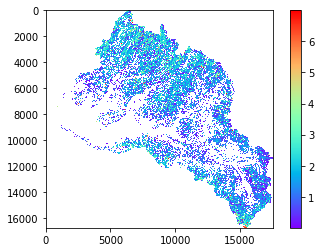

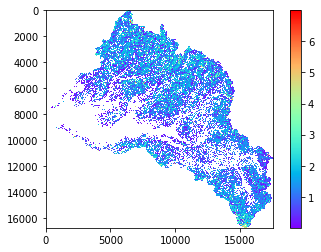

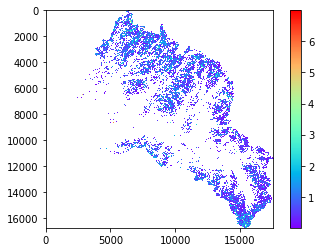

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


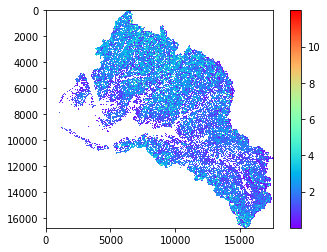

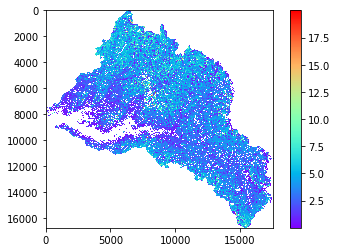

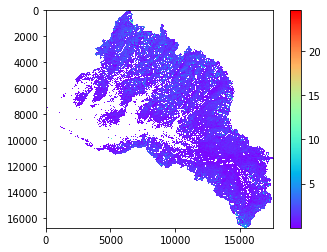

In [21]:
# Clean Data (Raster to numpy)

for f in sorted(flist):
    im = rasterio.open(f, 'r')
    a = im.read(1)
#     a = a.astype('float') #dont need this, values are already floats.....
    idx = a>0.001
    a[~idx] = np.nan
    
    plt.imshow(a, cmap ='rainbow')
    plt.colorbar()
    plt.show()
    

In [ ]:
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak'
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/peak/20150415_clipped.tif'

# for f in sorted(glob.glob(os.path.join(path, '*.tif'))):
#     print(f)
# #     dt_str = f.split('/')[-1]

# #     for c in dt_str:
# #         dt_str = "".join([c for c in dt_str if c.isnumeric()])


# raster = io.imread(f) #path

# f = rasterio.open(path, 'r')
# arr = f.read(1)
# print(type(arr))
# idx=arr>0.001
# print(arr.shape,arr[idx].shape)
# # arr = arr[idx]
# # print(arr.shape)
# plt.imshow(arr[idx], cmap='pink')
# plt.colorbar()
# plt.show()

fig = plt.figure(figsize=(20,8))
im = rasterio.open(path, 'r')
print(im.meta)
# f = im.read(1)
# m1=np.min(f)
# m2=np.max(f)
# print(m1,m2)
# print('f',f.shape)
# ff=f>0.001
# mi=np.min(ff)
# mx=np.max(ff)
# print(mi,mx)
# plt.imshow(ff)
# # plt.colorbar()
# plt.show()
# print('ff',ff.shape)
# # idx = f>0.001
# # f = img.read(1)
# # print(type(f))
# # print(f)
# # print(f.shape)
# # idx = f>0.001
# # f_= f[idx]
# # print(np.min(f))
# # print(np.max(f))
# # plt.imshow(f[idx].read(1), cmap='pink')
# # plt.colorbar()
# # plt.show()

# # # show_hist(f,bins=30)
# # # plt.show()
# # # print('done')
